# Monte Carlo Data

In [3]:
import numpy as np
from numpy.linalg import inv as inverse
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sympy as sy
import prettyplotlib as ppl

from scipy.optimize import curve_fit


sns.set_style(style='white')
fontsize_labels = 22    # size used in latex document
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['text.usetex'] = True
rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['axes.titlesize'] = fontsize_labels
rcParams['figure.figsize'] = (3*6.2, 3*3.83)  # in inches; width corresponds to \textwidth in latex document (golden ratio)
chars=["Electrons","Muons","Taons","Hadrons"]

# Rescaling the number of events to fit the branching ratio

In [4]:
# Loading of the data. We saved the ROOT files before as .npy files

ee = np.load("data/ee.npy")
mm = np.load("data/mm.npy")
tt = np.load("data/tt.npy")
qq = np.load("data/qq.npy")
ff = [ee,mm,tt,qq]
rescale = False
if rescale == True:
    print([len(r) for r in ff])
    chars=["Electrons","Muons","Taons","Hadrons"]
    br = [3.3,3.3,3.3,70]

    # Making all leptons equal branching ratio
    new_ee = []
    while len(ee)+len(new_ee)<len(mm):
        new_ee += [ee[np.random.randint(len(ee))]]
    ee = np.append(ee,new_ee) 

    new_tt = []
    while len(tt)+len(new_tt)<len(mm):
        new_tt += [tt[np.random.randint(len(tt))]]
    tt = np.append(tt,new_tt)   

    # Adopting a branching ratio of 70 for qq
    len_qq = len(ee)/3.3 *70
    multiplier = int(np.floor(len_qq / len(qq)))-1
    qq = np.append(qq,[qq]*multiplier)

    new_qq = []
    while len(qq)+len(new_qq)< len_qq:
        new_qq += [qq[np.random.randint(len(qq))]]
    qq = np.append(qq,new_qq)

    ff = [ee,mm,tt,qq]
    print([len(r) for r in ff])

all_ff = np.append(ee,[mm,tt,qq])

## 1. Cleaning up electron data

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


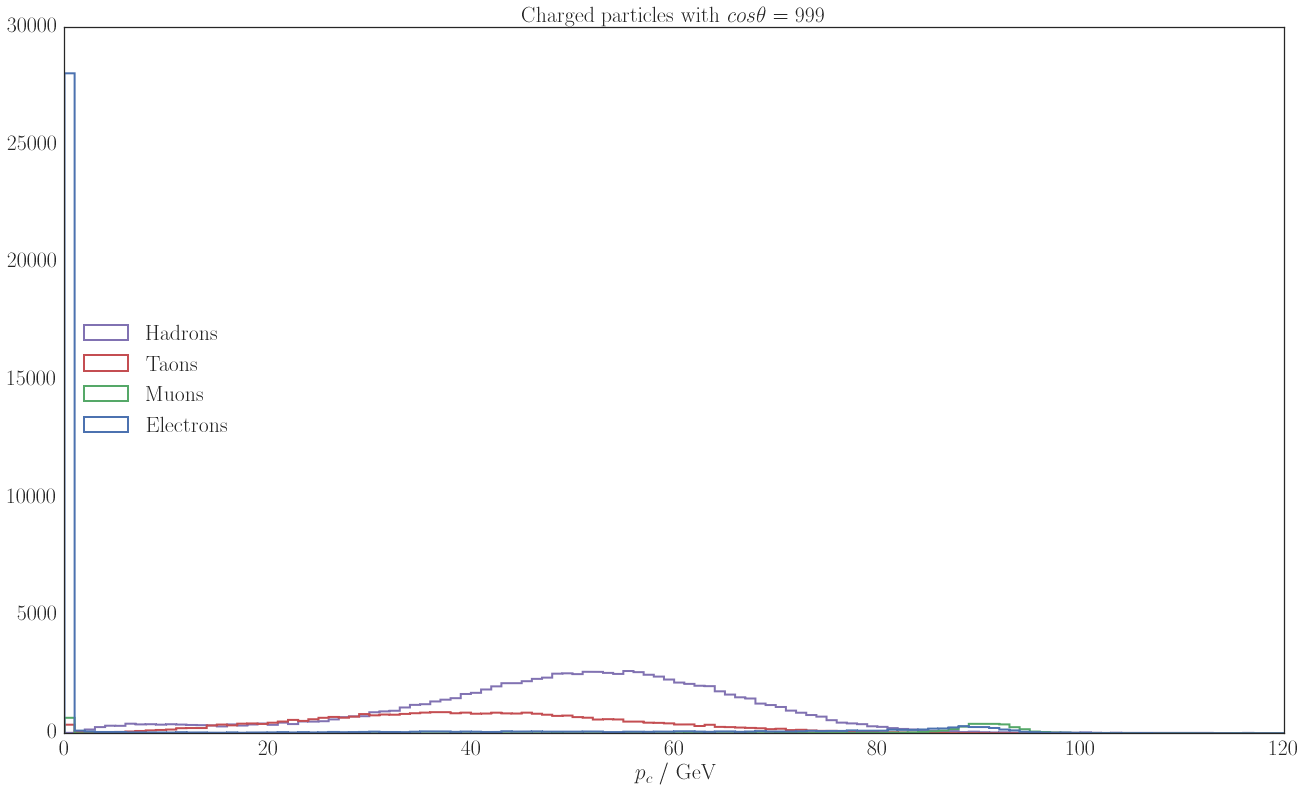

In [5]:
f, ax1 = plt.subplots(1, 1)
   
ax1.hist([u["Pcharged"][u["cos_thet"]>900] for u in ff],120, range=(0,120),label=chars, histtype="step",linewidth=2)
ax1.set_title("Charged particles with $cos\\theta = 999$")
ax1.set_xlabel("$p_c$ / GeV")
ax1.legend(loc=6)

plt.show()

Tragen Sie auch die Verteilungen der oben angegebenen Variablen für die einzelnen Datensätze auf
und versuchen Sie, diese in Hinblick auf Detektoraufbau und Akzeptanzverlust zu verstehen.

/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


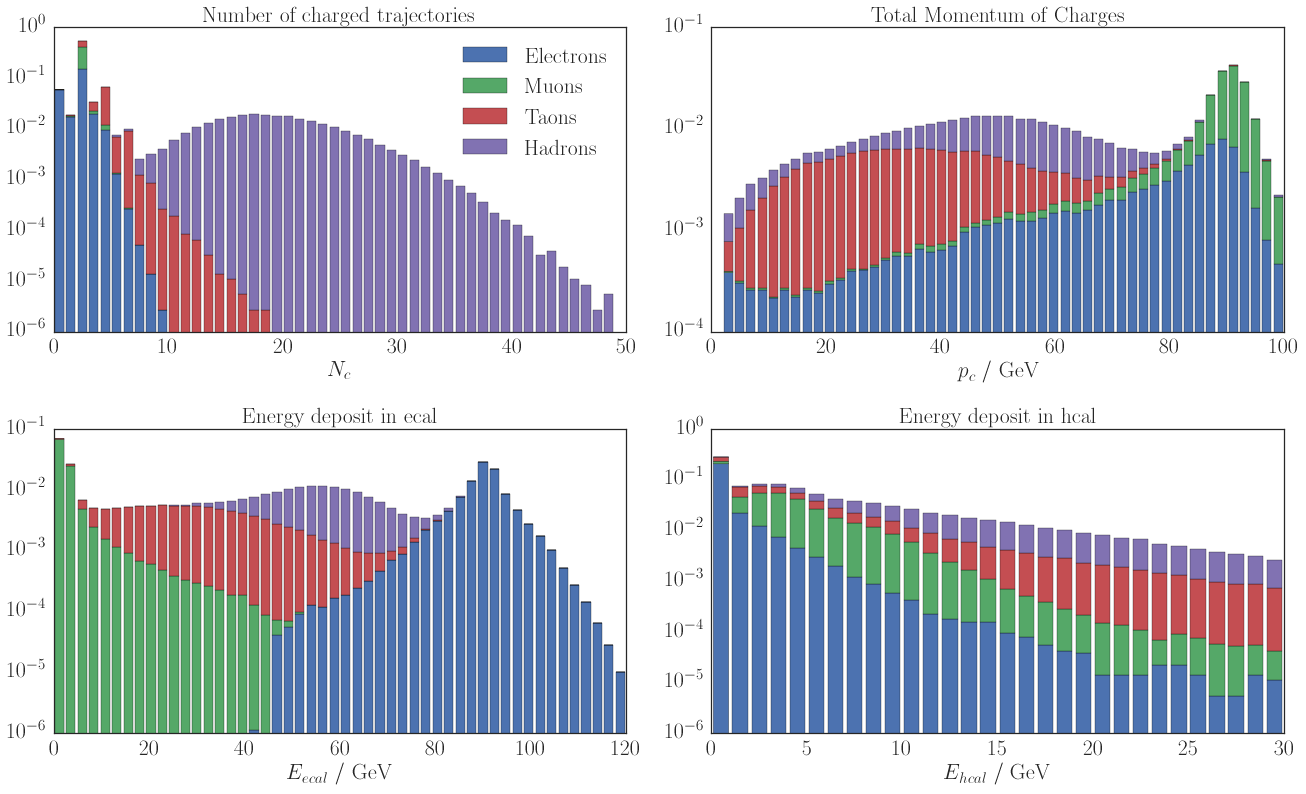

In [6]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.hist([r["Ncharged"] for r in ff],50,histtype='barstacked',range=(0,50),label = chars, log=True, normed = True)
#ax1.hist([r["Ncharged"] for r in ff],50,histtype='bar',range=(0,50))
ax1.set_title("Number of charged trajectories")
ax1.set_xlabel("$N_c$")
ax1.legend()

ax2.hist([r["Pcharged"] for r in ff],50,range=(2,100),histtype='barstacked',label= chars,  normed = True,log=True)
#ax2.hist(mm["Pcharged"],100,range=(2,100))
ax2.set_title("Total Momentum of Charges")
ax2.set_xlabel("$p_c$ / GeV")

ax3.hist([r["E_ecal"] for r in ff],50,range=(0,120), label = chars,histtype='barstacked',  normed = True,log=True)
ax3.set_title("Energy deposit in ecal")
ax3.set_xlabel("$E_{ecal}$ / GeV")

ax4.hist([r["E_hcal"] for r in ff],30,log=True, range=(0,30), label= chars,histtype='barstacked',  normed = True)
ax4.set_title("Energy deposit in hcal")
ax4.set_xlabel("$E_{hcal}$ / GeV")

plt.show()

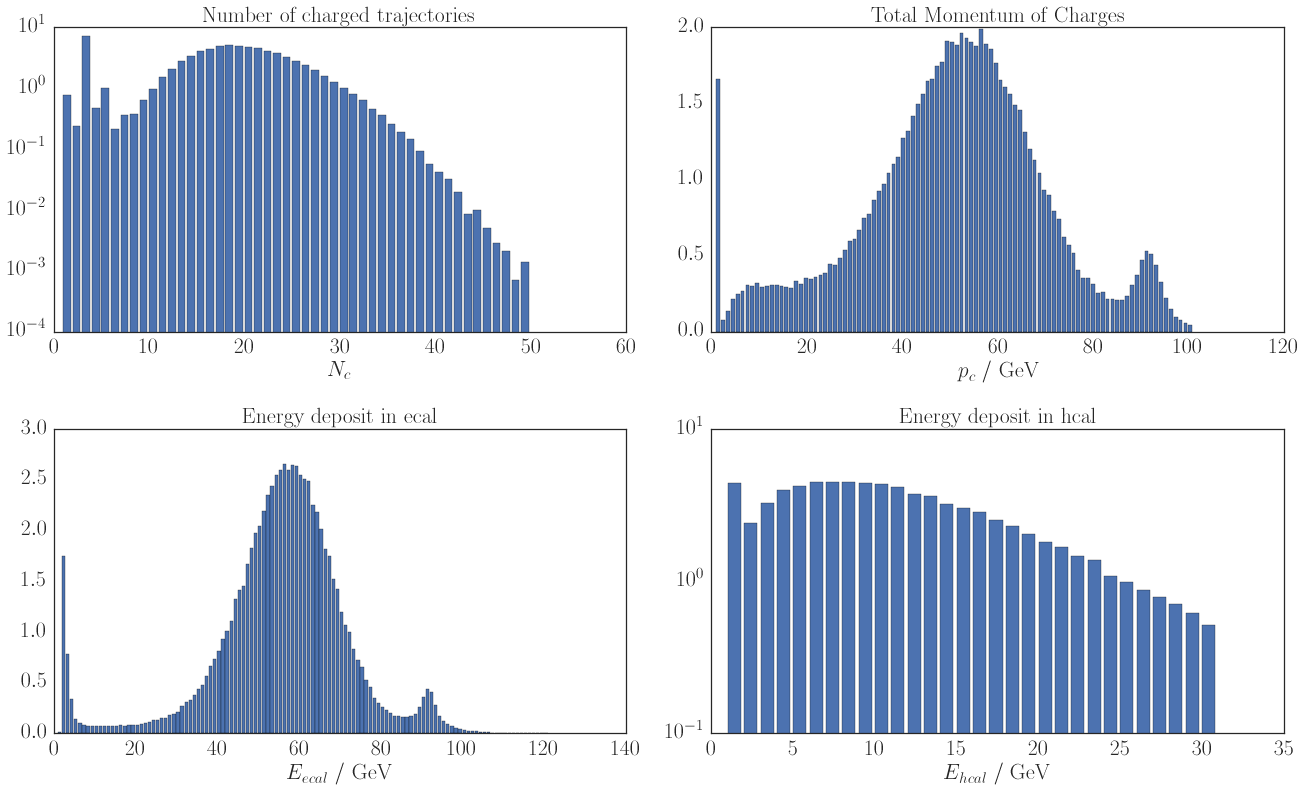

In [7]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
br = [3.3,3.3,3.3,70]

def sum_P(var,len_, range_):
    P_all = np.zeros(len_)
    for ur,r in enumerate(ff):
        P, edges = np.histogram(r[var],len_,range =range_ , density = True)
        P*= br[ur]
        P_all += P
    return P_all, edges

P_all, edges = sum_P("Ncharged",50,(0,50))    
ax1.bar(edges[1:],P_all)
ax1.set_title("Number of charged trajectories")
ax1.set_xlabel("$N_c$")
ax1.set_yscale("log")

P_all, edges = sum_P("Pcharged",98,(0,100))    
ax2.bar(edges[1:],P_all)
#ax2.hist(mm["Pcharged"],100,range=(2,100))
ax2.set_title("Total Momentum of Charges")
ax2.set_xlabel("$p_c$ / GeV")

P_all, edges = sum_P("E_ecal",120,(0,120))
ax3.bar(edges[1:],P_all)
ax3.set_title("Energy deposit in ecal")
ax3.set_xlabel("$E_{ecal}$ / GeV")

P_all, edges = sum_P("E_hcal",30,(0,30))  
ax4.bar(edges[1:],P_all)
ax4.set_title("Energy deposit in hcal")
ax4.set_xlabel("$E_{hcal}$ / GeV")
ax4.set_yscale("log")

plt.show()

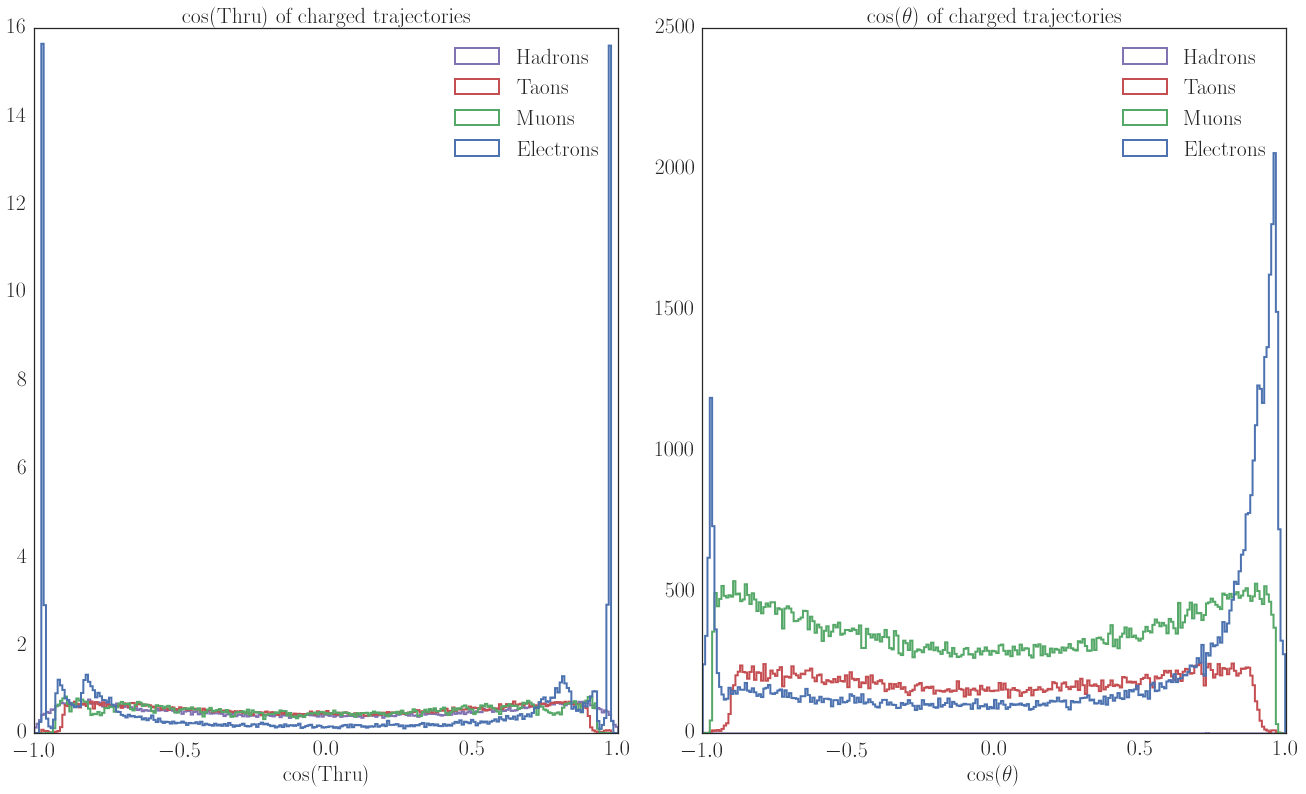

In [8]:
f, (ax1,ax2) = plt.subplots(1, 2)

ax1.hist([r["cos_thru"][r["cos_thru"]!=999] for r in ff],250, label=chars, histtype="step",linewidth=2,normed = True)
ax1.set_title("$\\cos(\\mathrm{Thru})$ of charged trajectories")
ax1.set_xlabel("$\\cos(\\mathrm{Thru})$")
ax1.legend()

ax2.hist([r["cos_thet"][r["cos_thet"]!=999] for r in ff],250, label=chars, histtype="step",linewidth=2,)
ax2.set_title("$\\cos(\\theta)$ of charged trajectories")
ax2.set_xlabel("$\\cos(\\theta)$")
ax2.legend()

plt.show()

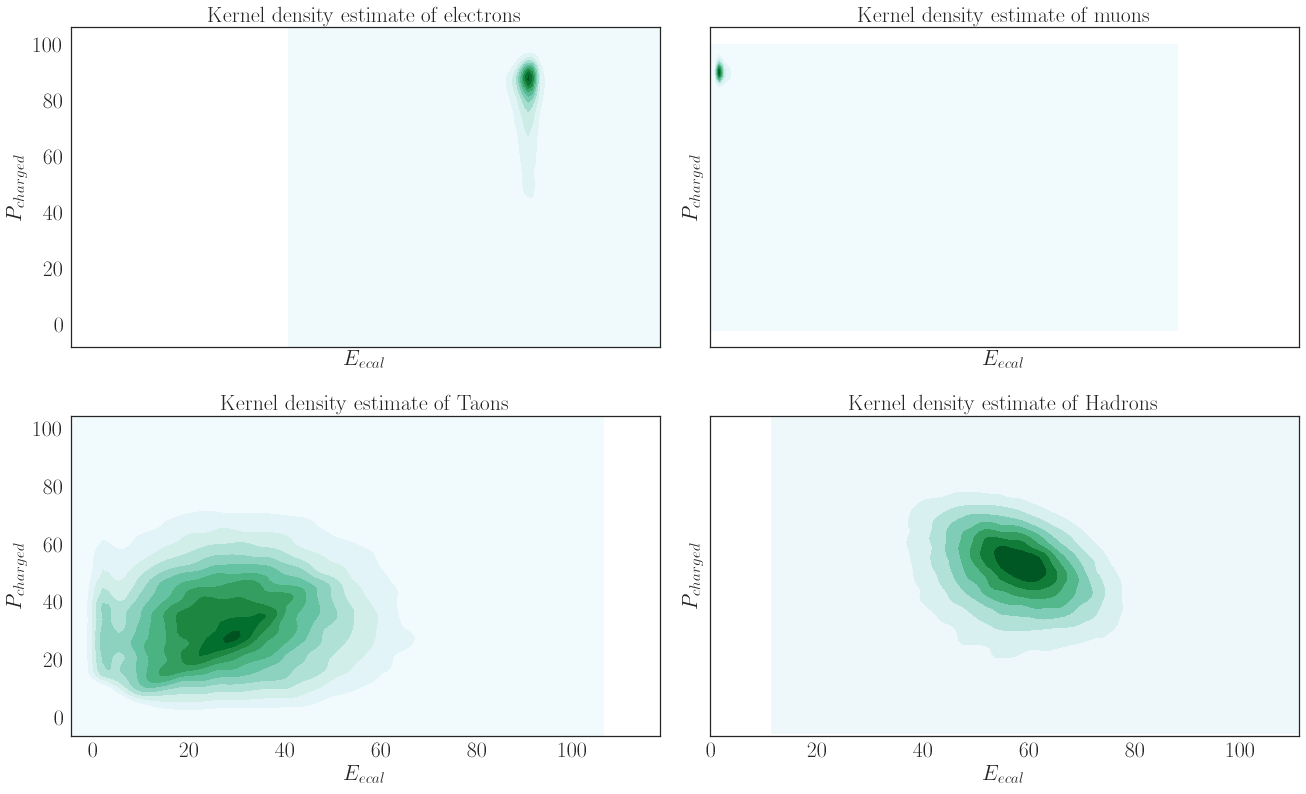

In [9]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

ch= (ff[0]["Pcharged"] != 0) * (ff[0]["Pcharged"] < 100)
sns.kdeplot(ff[0]["E_ecal"][ch],ff[0]["Pcharged"][ch], shade=True, ax=ax1)
ax1.set_title("Kernel density estimate of electrons")
ax1.set_xlabel("$E_{ecal}$")
ax1.set_ylabel("$P_{charged}$")

ch= (ff[1]["Pcharged"] != 0) * (ff[1]["Pcharged"] < 100)
sns.kdeplot(ff[1]["E_ecal"][ch],ff[1]["Pcharged"][ch], shade=True, ax=ax2)
ax2.set_title("Kernel density estimate of muons")
ax2.set_xlabel("$E_{ecal}$")
ax2.set_ylabel("$P_{charged}$")

ch= (ff[2]["Pcharged"] != 0) * (ff[2]["Pcharged"] < 100)
sns.kdeplot(ff[2]["E_ecal"][ch],ff[2]["Pcharged"][ch], shade=True, ax=ax3)
ax3.set_title("Kernel density estimate of Taons")
ax3.set_xlabel("$E_{ecal}$")
ax3.set_ylabel("$P_{charged}$")

ch= (ff[3]["Pcharged"] != 0) * (ff[3]["Pcharged"] < 100)
sns.kdeplot(ff[3]["E_ecal"][ch],ff[3]["Pcharged"][ch], shade=True, ax=ax4)
ax4.set_title("Kernel density estimate of Hadrons")
ax4.set_xlabel("$E_{ecal}$")
ax4.set_ylabel("$P_{charged}$")

plt.show()

# Seperate the $s$ and $t$ channel

NameError: name 'costhetamin' is not defined

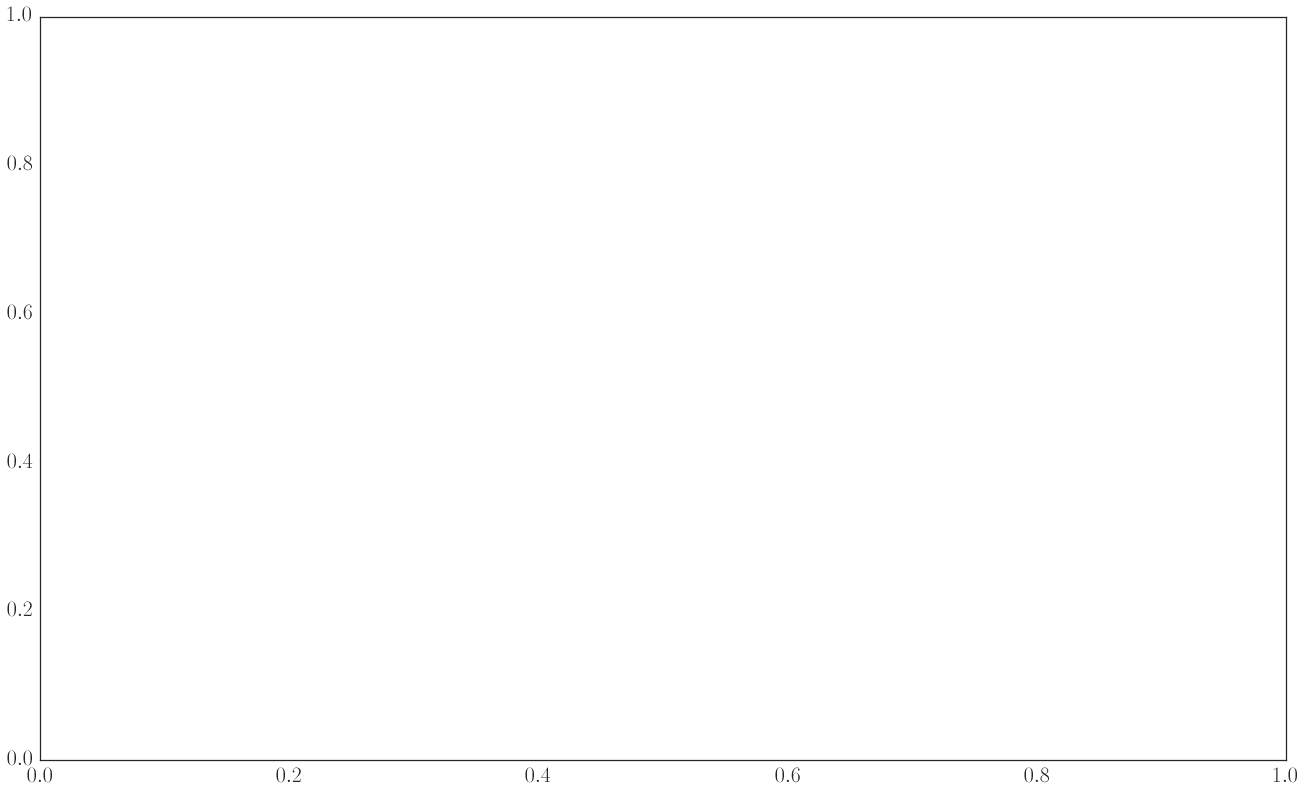

In [10]:
l = np.linspace(0,1,1000)


f, ax1 = plt.subplots(1, 1)

def ts_channel(cos_theta,A,B):
    return A*(1 + cos_theta**2) + B * (1 - cos_theta)**(-2) 

# inital guess
A = 1
B = 1

N_ee, cos_thet = np.histogram(ff[0]["cos_thet"][(ff[0]["cos_thet"]>costhetamin)*(ff[0]["cos_thet"]<costhetamax)],250, density=True)

[A,B], cov = curve_fit(ts_channel, cos_thet[1:], N_ee, p0=[A,B])

cos_thet2 = np.linspace(costhetamin,costhetamax,1000)
plt.plot(cos_thet2, ts_channel(cos_thet2,A,B),label = "s+t")
plt.plot(cos_thet2, A*(1 + cos_thet2**2),label = "s with $A(1 + \\cos\\theta^2)$ with $A=%.3f$"%A)
plt.plot(cos_thet2, B * (1 - cos_thet2)**(-2),label = "t with $B (1 - \\cos\\theta)^{-2}$ with $B=%.3f$"%B)


ax1.hist(ff[0]["cos_thet"],250, histtype="step",linewidth=2, range=(costhetamin,costhetamax),normed=True)
ax1.set_title("Least squares fit  Electron Angles")
ax1.set_xlabel("$\\cos(\\theta)$")
ax1.legend(loc=10)

ax1.plot(l*0 + costhetamin ,l, 'r--')
ax1.plot(l*0 + costhetamax ,l, 'r--')

plt.show()

## Scaling the $st$ to $s$

$$N_s = \int_{a}^{b} A(1+cos^2(\theta)) d\theta = \frac{A}{4} \left [ 6 \theta - \sin(2 \theta) \right]_a^b $$

In [ ]:
F = lambda x: 0.25*(6*x + np.sin(2*x))
thetamin =  np.arccos(costhetamin)
thetamax =  np.arccos(costhetamax)
N_s = -A*(F(thetamax)-F(thetamin))*len(ff[0])
sigma = N_s / len(ff[0])
print("%.3f %% of the electrons are in s channel"%(100*sigma))

# Difference in cuts with respect to s and t channel?

The question is whether an optimization of the cuts is dependent the respective properties of the s and the t channel. From the figure before we can impose that for $cos\theta < 0$ the s-Channel dominates while for $cos\theta > 0$ the t-Channel. In the following we check if the s and the t channel have different behavior for the variables. The result is that there is no big difference and hence we can do the optimization of the cuts with ts channel and cut the t-channel out after.

In [ ]:
f, ax1 = plt.subplots(1, 1)
var = "Pcharged"
ax1.hist(ff[0][var],100,range=(2,100),histtype='step',label= "t + s", linewidth=2)
ax1.hist(ff[0][var][ff[0]["cos_thet"]< 0 ],100,range=(2,100),histtype='step',label= "s", linewidth=2)
ax1.hist(ff[0][var][ff[0]["cos_thet"]> 0 ],100,range=(2,100),histtype='step',label= "t", linewidth=2)
#ax2.hist(mm["Pcharged"],100,range=(2,100))
ax1.set_title("Momentum of electrons of different channels")
ax1.set_xlabel("$p_c$ / GeV")
ax1.legend(loc=2)

# General Cuts

In [ ]:
# We impose for now that there are no intersections 
C_eff = np.zeros([4,4])

all_ee = 0
all_mm = 0
all_tt = 0
all_qq = 0

for u_i,u in enumerate(ff):
    print("\nnow looking for", chars[u_i])
    # Electrons
    c_ee =        (u["E_ecal"]   >= 60)*(u["E_ecal"] <= 120)\
                * np.logical_or((u["Pcharged"] >= 40)*(u["Pcharged"] <= 100),(u["Pcharged"] == 0))\
                * (u["Ncharged"] >= 0)*(u["Ncharged"] <= 10)
    print("found %d of %d electrons"%(sum(c_ee)*sigma,len(u)*sigma))
    all_ee += sum(c_ee)
    
    rest = np.invert(c_ee)
    
    # Muons 
    c_mm = rest * (u["Pcharged"] >= 80)*(u["Pcharged"] <= 100)\
                * (u["E_ecal"] >= 0)*(u["E_ecal"] <= 20)\
                * (u["Ncharged"] >= 1)*(u["Ncharged"] <= 10) 
    rest = np.invert(c_mm)*rest
    print("found %d of %d muons"%(sum(c_mm),len(u)))
    all_mm += sum(c_mm)
    
    # Hadrons
    c_qq = rest * (u["Ncharged"] >= 10)*(u["Ncharged"] <= 30) \
                * (u["E_ecal"] >= 40)*(u["E_ecal"] <= 80) \
                * (u["Pcharged"] >= 20)*(u["Pcharged"] <= 80)
    rest = np.invert(c_qq)*rest
    print("found %d of %d hadrons"%(sum(c_qq),len(u)))
    all_qq += sum(c_qq)
    
    # Taons 
    c_tt = rest * (u["Ncharged"] >= 1)*(u["Ncharged"] <= 15) \
                * (u["E_ecal"] >= 0)*(u["E_ecal"] <= 60) \
                * (u["Pcharged"] >= 0)*(u["Pcharged"] <= 80)
    rest = np.invert(c_tt)*rest
    print("found %d of %d taons"%(sum(c_tt),len(u)))
    all_tt += sum(c_tt)
    
    C_eff[u_i,:] = np.array([sum(c_ee),sum(c_mm),sum(c_tt),sum(c_qq)])/len(u)
    print("We did not classify %d particles = %.3f%%"%(sum(rest),100*sum(rest)/len(u)))

C_eff = C_eff.swapaxes(0,1)
all_len = sum(len(u) for u in ff)
print("found %d electrons \t= %.3f %%"%((all_ee),100*(all_ee)/all_len))
print("found %d muons     \t= %.3f %%"%((all_mm),100*(all_mm)/all_len))
print("found %d hadrons   \t= %.3f %%"%((all_qq),100*(all_qq)/all_len))
print("found %d tauons    \t= %.3f %%"%((all_tt),100*(all_tt)/all_len)) 

In [ ]:
print(C_eff)
fig, ax1 = plt.subplots(1, 1)

ppl.pcolormesh(fig, ax1, C_eff, 
               xticklabels=chars, 
               yticklabels=[k + " Montecarlo" for k in chars])
plt.show()

In [ ]:
print(inverse(C_eff))
np.save("data/C_eff.npy",C_eff)

In [ ]:
x = np.random.random(1000)